In [1]:
import sys, os, json
import numpy as np
sys.path.append('../src/')
import torch
from mgnn.MolGraphNetwork import MolGraphNetwork
from utils import find_repo_root
from scf_guess_tools import Backend
from scf_guess_datasets import Qm9

project_root_dir = find_repo_root()
print("Project root directory:", project_root_dir)
BASIS_PATH = "../../../scripts/6-31g_2df_p_custom_nwchem.gbs"

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)


Project root directory: /home/etschgi1/REPOS/Masterarbeit
Using device: cpu


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
sys.path.append('../src/')
sys.path.append("../../scripts/")
from plt_config import use_latex, TU_GREY, TU_RED
use_latex()
sns.set_palette(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
local_pc_path = os.path.join(project_root_dir, "datasets/QM9") if str(device) != "cuda" else "/home/dmilacher/datasets/data1"
dataset = Qm9(
    local_pc_path, 
    size = 500, # number of molecules to load
    # val=0.1, # using 80% training / 10 % val / 10% test split
    # test=0.1
)


In [4]:
with open(os.path.join(project_root_dir, "latex/scripts/application/data/stats_best_full.json")) as f:
    stats = json.load(f)

In [13]:
iterations = stats["iterations"]
iterations = [int(i) for i in iterations]

test_n = [dataset.molecule(x).natm for x in dataset.test_keys]
test_n = [int(n) for n in test_n]

/tmp/ipykernel_228586/3734459776.py:29: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("natm_bin")["iterations"].mean(),
/tmp/ipykernel_228586/3734459776.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("natm_bin")["iterations"].mean().max() + 0.5,


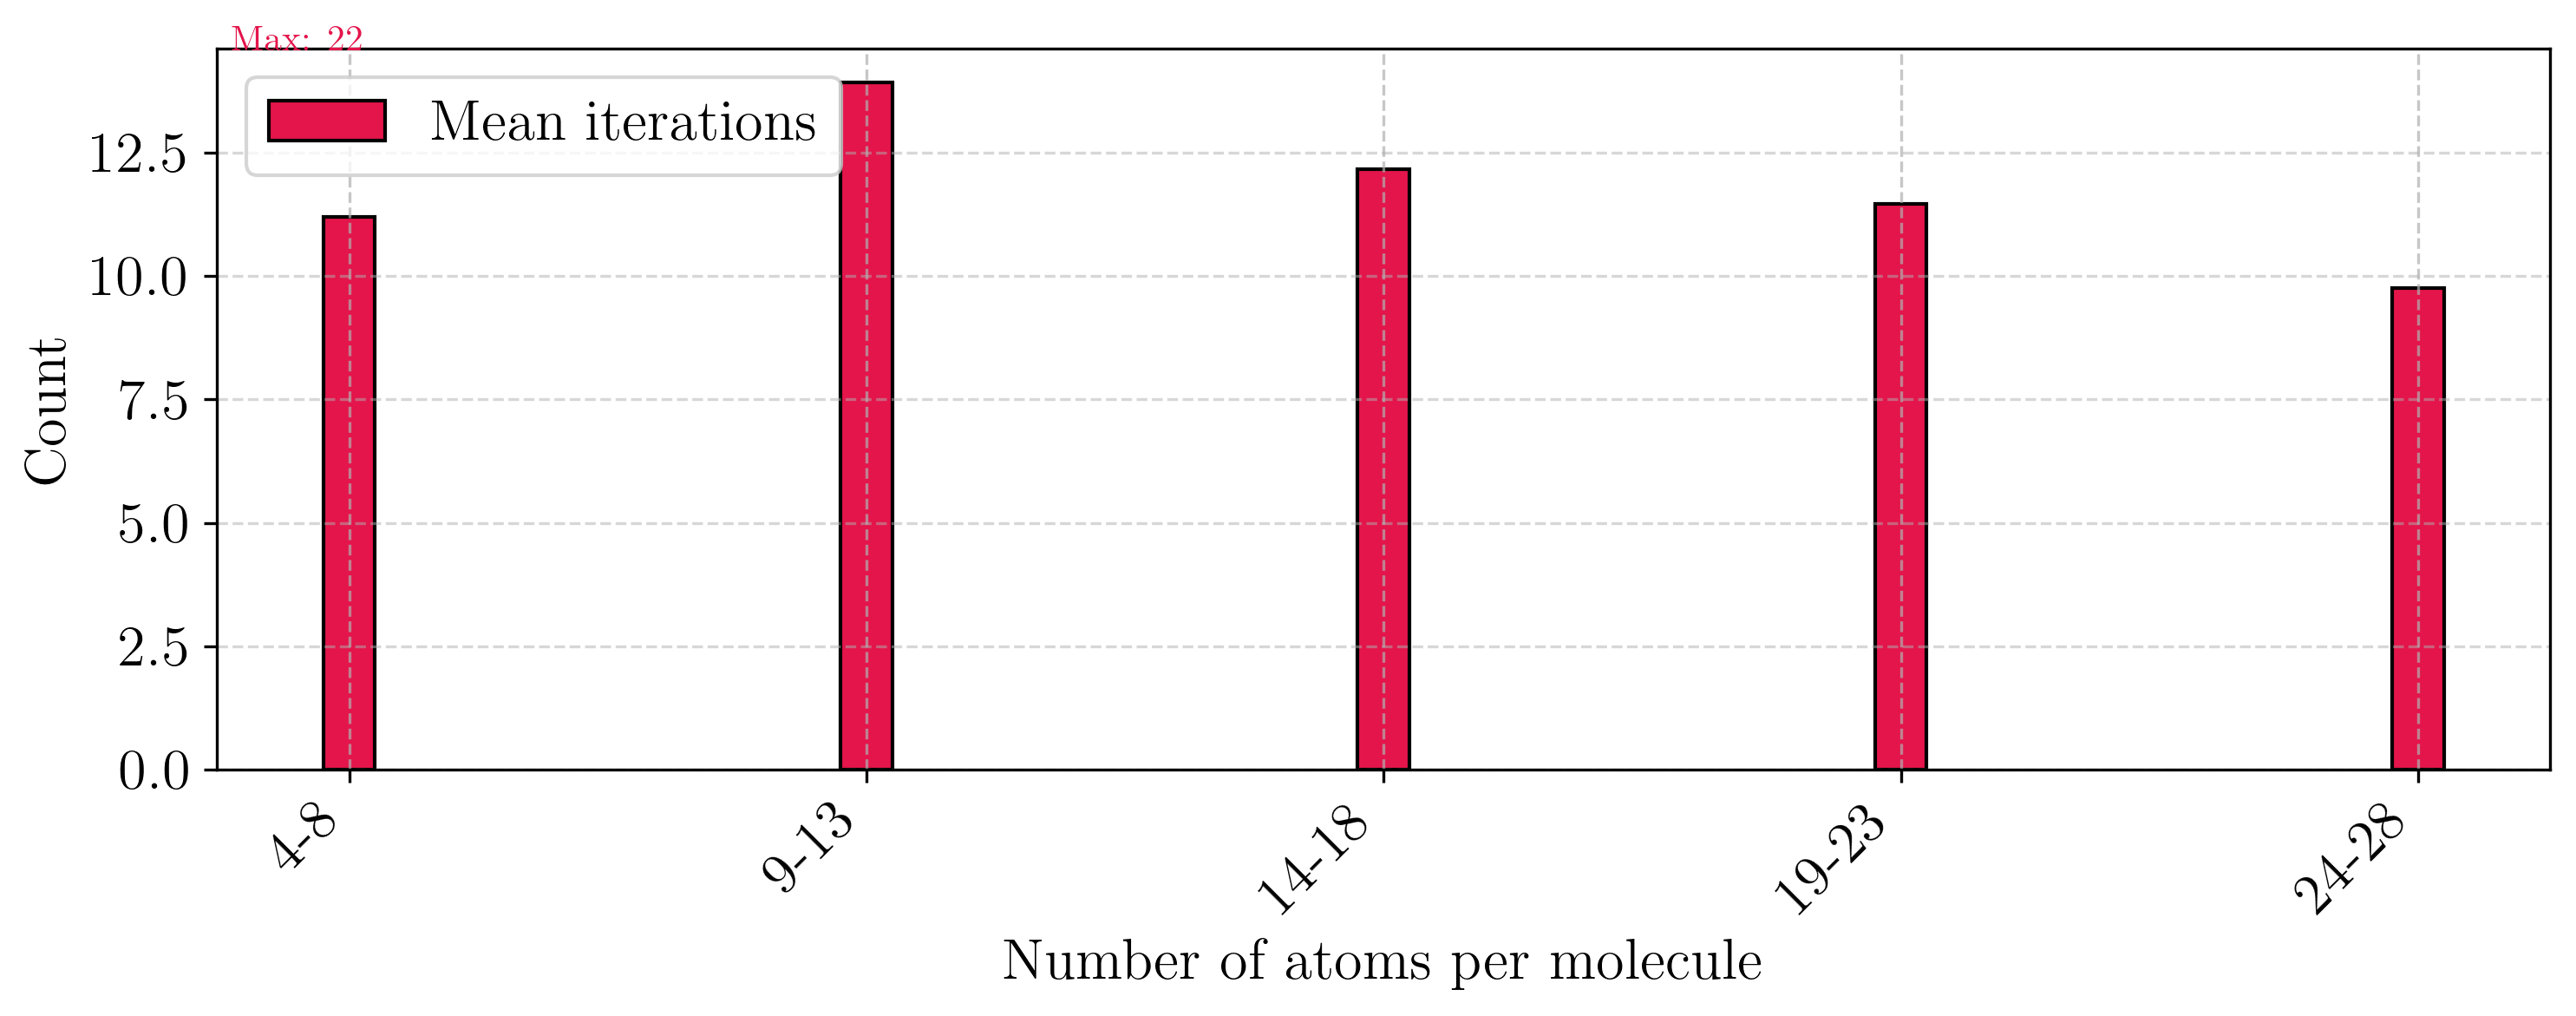

In [ ]:
df = pd.DataFrame({
    "natm": test_n,
    "iterations": iterations,
})


bin_width = 5
min_atm, max_atm = df["natm"].min(), df["natm"].max()
edges = np.arange(min_atm-1, max_atm + bin_width, bin_width)
labels = [f"{int(edges[i])}-{int(edges[i+1]-1)}" for i in range(len(edges)-1)]
bin_centers = (edges[:-1] + edges[1:]) / 2


df["natm_bin"] = pd.cut(
    df["natm"],
    bins=edges,
    labels=labels,
    include_lowest=True,
    right=False  # [left, right)
)


plt.figure(figsize=(10, 4))

bar_width = 0.5
offsets = [-bar_width, 0, +bar_width] 

plt.bar(bin_centers,
        df.groupby("natm_bin")["iterations"].mean(),
            width=bar_width,
            label="Mean iterations",
            edgecolor="black")
plt.text(bin_centers[0] - bar_width,
         df.groupby("natm_bin")["iterations"].mean().max() + 0.5,
         f"Max: {df['iterations'].max()}",
         ha="center", va="bottom", fontsize=10, color=TU_RED)

plt.xticks(bin_centers, labels, rotation=45, ha="right")
plt.xlabel("Number of atoms per molecule")
plt.ylabel("Count")
plt.legend(title="", loc="upper left")
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
# plt.savefig(savepath)
plt.show()
